In [94]:
import pandas as pd

train_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Titanic/data/train.tsv', sep='\t')
test_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/EX/Titanic/data/test.tsv', sep='\t')

In [95]:
print(train_data.head())
print(test_data.head())

   id  survived  pclass     sex   age  sibsp  parch     fare embarked
0   3         1       1  female  35.0      1      0  53.1000        S
1   4         0       3    male  35.0      0      0   8.0500        S
2   7         0       3    male   2.0      3      1  21.0750        S
3   9         1       2  female  14.0      1      0  30.0708        C
4  11         1       1  female  58.0      0      0  26.5500        S
   id  pclass     sex   age  sibsp  parch     fare embarked
0   0       3    male  22.0      1      0   7.2500        S
1   1       1  female  38.0      1      0  71.2833        C
2   2       3  female  26.0      0      0   7.9250        S
3   5       3    male   NaN      0      0   8.4583        Q
4   6       1    male  54.0      0      0  51.8625        S


In [96]:
X = train_data.drop(['age', 'survived'], axis=1)
y = train_data['survived']

In [97]:
X['sex'] = X['sex'].replace({'male': 1, 'female': 0})
X = pd.get_dummies(X, columns=['embarked'], drop_first=True)
# X['embarked'] = X['embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
X = X.astype(int)

In [98]:
print(X.head())
print('----------------')
print(y.head())

   id  pclass  sex  sibsp  parch  fare  embarked_Q  embarked_S
0   3       1    0      1      0    53           0           1
1   4       3    1      0      0     8           0           1
2   7       3    1      3      1    21           0           1
3   9       2    0      1      0    30           0           0
4  11       1    0      0      0    26           0           1
----------------
0    1
1    0
2    0
3    1
4    1
Name: survived, dtype: int64


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

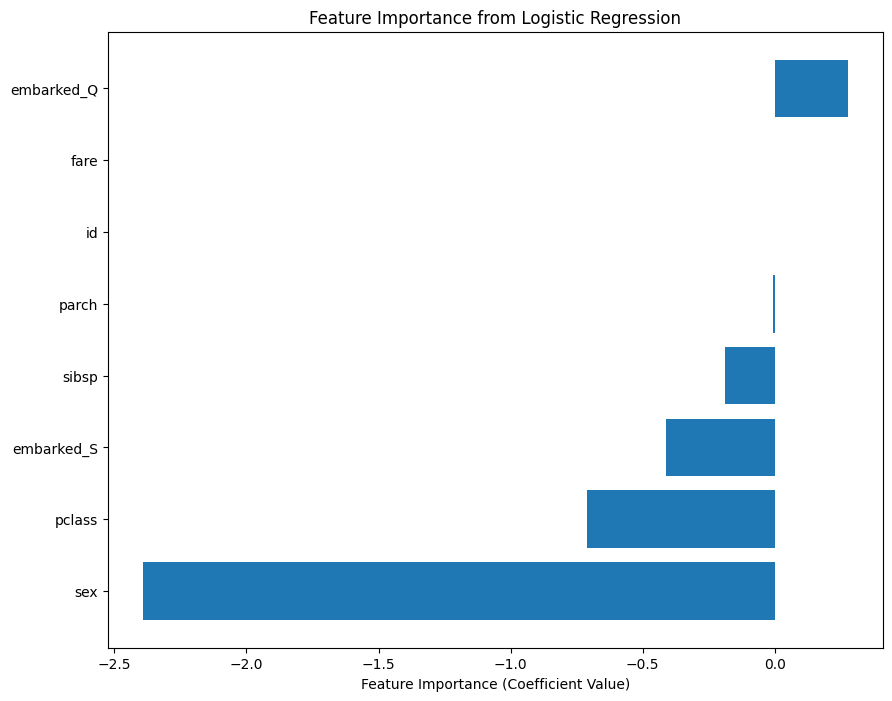

In [101]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# 各特徴量の係数（重要度）を取得
feature_importance = model.coef_[0]

# 特徴量名の取得
features = X.columns

# 特徴量の影響度をソート
sorted_idx = np.argsort(feature_importance)

# 重要度のプロット
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel('Feature Importance (Coefficient Value)')
plt.title('Feature Importance from Logistic Regression')
plt.show()

In [102]:
y_pred = model.predict(X_valid)
roc_auc = roc_auc_score(y_valid, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8341450216450217


In [103]:
# 各クラスに対する予測確率の取得 (クラス1の確率のみ取得)
y_pred_proba = model.predict_proba(X_valid)[:, 1]

# ROC AUCスコア（予測確率を使った評価）
roc_auc_proba = roc_auc_score(y_valid, y_pred_proba)

print("ROC AUC Score (using probabilities):", roc_auc_proba)


ROC AUC Score (using probabilities): 0.8858225108225107


In [104]:
test_data = test_data.drop('age', axis=1)
# y = train_data['survived']
test_data['sex'] = test_data['sex'].replace({'male': 1, 'female': 0})
test_data = pd.get_dummies(test_data, columns=['embarked'], drop_first=True)
# X['embarked'] = X['embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
X = X.astype(int)
test_data = test_data[X.columns]

In [105]:
test_predictions = model.predict(test_data)
output = pd.DataFrame({'id': test_data['id'], 'prediction': test_predictions})
output.to_csv('test_predictions.tsv', index=False, header=False, sep="	")
print("予測結果を 'test_predictions.tsv' に保存しました。")

予測結果を 'test_predictions.tsv' に保存しました。
